In [12]:
from astropy.io import fits
from matplotlib.colors import PowerNorm
import numpy as np
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.table import vstack
import seaborn as sns
from statistics import median

In [31]:
df = pd.read_csv("../Ha-emitters/Halpha_Mine_PerField_total-unique.csv")

In [32]:
# Definition for the colors
def colour(table, f1, f2, f3, f4):
    xcolour = table[f1] - table[f2]
    ycolour = table[f3] - table[f4]
    return xcolour, ycolour

In [33]:
# Errors of the colors
def errormag(table, ef1, ef2, ef3, ef4):
    excolour = np.sqrt(table[ef1]**2 + table[ef2]**2)
    eycolour = np.sqrt(table[ef3]**2 + table[ef4]**2)
    return excolour, eycolour

In [34]:
cx, cy = colour(df, "z_PStotal", "J0861_PStotal", "r_PStotal", "J0660_PStotal")
# error
ecx, ecy = errormag(df, "e_z_PStotal", "e_J0861_PStotal", "e_r_PStotal", "e_J0660_PStotal")

Median 0.022569017990109828


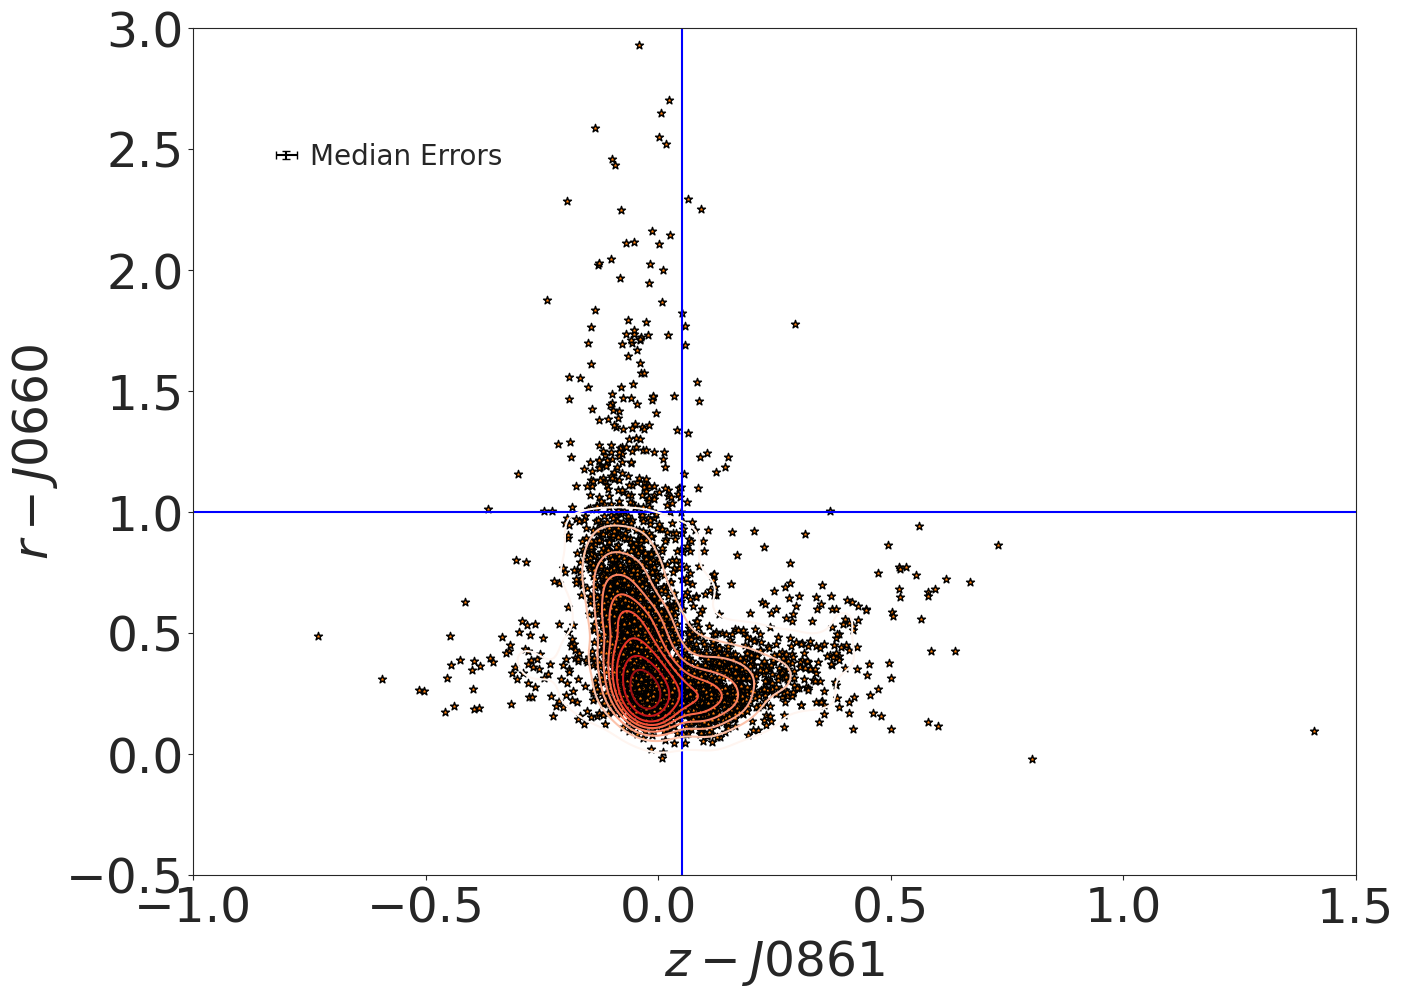

In [35]:
# Plotting
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(15, 11))
    #ax.spines["top"].set_visible(False)  
    #ax.spines["right"].set_visible(False)
    plt.xlabel(r"$z - J0861$", fontsize=35)
    plt.ylabel(r"$r - J0660$", fontsize=35)
    plt.tick_params(axis='x', labelsize=35) 
    plt.tick_params(axis='y', labelsize=35)

    # Create a density plot
    #density = ax.hexbin(cx, cy, cmap="nipy_spectral", gridsize=10, mincnt=1.0)
    #ax.scatter(cx, cy, color="#ff7f0e", marker="*", edgecolors="k", zorder=1)

    # Add a colorbar with improved visibility
    #cbar = plt.colorbar(density, ax=ax, orientation='vertical', pad=0.03, format='%.1f')
    #cbar.set_label("Density", fontsize=30)  # Provide a label for the colorbar
    # Contour plot
    # contour = sns.kdeplot(
    #     x=cx,
    #     y=cy,
    #     ax=ax,
    #     bw_method='silverman',  
    #     levels=[0.01, 0.05, 0.1, 0.2, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99],  
    #     fill=False,  
    #     zorder=3,  
    #     linewidths=2,  
    #     colors=['#AEEEEE', '#87CEEB', '#4682B4', '#4169E1'],  
    # )
    # Calcular el rango intercuartílico (IQR) para filtrar los datos en x e y
    q1_x, q3_x = np.percentile(cx, [65, 95])
    iqr_x = q3_x - q1_x
    lower_bound_x = q1_x - 1.5 * iqr_x
    upper_bound_x = q3_x + 1.5 * iqr_x

    q1_y, q3_y = np.percentile(cy, [35, 75])
    iqr_y = q3_y - q1_y
    lower_bound_y = q1_y - 1.5 * iqr_y
    upper_bound_y = q3_y + 1.5 * iqr_y

    # Filtrar los datos de cx y cy
    filtered_cx = cx[(cx > lower_bound_x) & (cx < upper_bound_x)]
    filtered_cy = cy[(cy > lower_bound_y) & (cy < upper_bound_y)]

    # Graficar los datos filtrados
    sns.kdeplot(x=filtered_cx, y=filtered_cy, ax=ax, norm=PowerNorm(0.5), zorder=5, cmap="Reds")
    ax.scatter(cx, cy, color="#ff7f0e", marker="*", edgecolors="k", zorder=1)

    ax.set(
        xlim=[-1., 1.5],
        ylim=[-0.5, 3.0])

    plt.axvline(x = 0.05, color = 'b')
    plt.axhline(y = 1, color = 'b')
    pro_ri = median(ecx)
    pro_rj660 = median(ecy)
    print("Median", pro_ri)
    axis_coordinates_of_representative_error_bar = (0.08, 0.85)
    screen_coordinates_of_representative_error_bar = ax.transAxes.transform(axis_coordinates_of_representative_error_bar)
    screen_to_data_transform = ax.transData.inverted().transform
    data_coordinates_of_representative_error_bar = screen_to_data_transform(screen_coordinates_of_representative_error_bar)
    foo = data_coordinates_of_representative_error_bar

    ax.errorbar(foo[0], foo[1], xerr=pro_ri, yerr=pro_rj660, c="k", capsize=3)
    ax.annotate("Median Errors", xy=(-0.39, 2.78),  xycoords='data', size=20,
            xytext=(-120, -60), textcoords='offset points', )


In [52]:
mask = (df["z_PStotal"] - df["J0861_PStotal"] < 0.05) 
df_cut = df[mask]

In [53]:
df_cut

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
4,b'HYDRA-0031',b'iDR4_3_HYDRA-0031_0032774',150.917736,-26.667847,9368.1560,5633.4710,0.000384,1.078957,7.585842e-06,2.917582,...,15.852819,0.022,15.775820,0.015,15.204820,0.023,15.071949,0.020,15.141534,0.030
6,b'HYDRA-0036',b'iDR4_3_HYDRA-0036_0040710',159.647368,-26.335164,4481.6245,7820.3936,0.000301,1.018796,3.267747e-06,3.029539,...,16.936857,0.035,16.853857,0.029,16.287857,0.022,15.831639,0.032,15.777005,0.020
9,b'HYDRA-0040',b'iDR4_3_HYDRA-0040_0031328',151.483829,-28.154827,4597.9480,4992.2530,0.000350,1.016878,2.420467e-05,2.632255,...,14.221691,0.010,14.126691,0.009,13.673691,0.009,13.366109,0.015,13.272833,0.023
13,b'HYDRA-0046',b'iDR4_3_HYDRA-0046_0004504',161.640075,-28.700425,1164.7158,1407.7684,0.000335,0.891136,6.558835e-06,2.864985,...,17.026417,0.024,16.963417,0.024,16.327417,0.017,15.727429,0.023,15.612148,0.023
16,b'HYDRA-0049',b'iDR4_3_HYDRA-0049_0015998',149.524165,-29.888948,8964.4100,2704.3890,0.000338,1.074209,6.792246e-06,2.812645,...,17.609438,0.026,17.322866,0.031,16.484867,0.024,15.252979,0.018,14.800714,0.026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3631,b'STRIPE82-0154',b'iDR4_3_STRIPE82-0154_0021759',347.764095,0.624851,2096.9666,5008.7830,0.000302,0.935969,8.169368e-07,3.733428,...,NaN,NaN,NaN,NaN,19.994330,0.135,18.424236,0.112,17.553331,0.041
3632,b'STRIPE82-0157',b'iDR4_3_STRIPE82-0157_0016873',349.808612,-0.962720,7268.3916,3780.7950,0.000391,1.049551,8.169368e-07,3.894912,...,NaN,NaN,NaN,NaN,20.401480,0.137,18.918780,0.100,18.550900,0.059
3633,b'STRIPE82-0158',b'iDR4_3_STRIPE82-0158_0009177',350.254869,0.323001,4347.6445,3032.8470,0.000335,0.986151,6.768905e-07,4.712428,...,19.580069,0.111,19.594069,0.104,19.548069,0.088,18.961864,0.039,19.223470,0.122
3634,b'STRIPE82-0162',b'iDR4_3_STRIPE82-0162_0018498',352.418578,0.670626,8739.1020,5308.4004,0.000349,1.035019,6.068673e-07,3.826304,...,NaN,NaN,NaN,NaN,20.593569,0.147,17.811909,0.155,18.467216,0.062


In [54]:
cx_, cy_ = colour(df_cut, "z_PStotal", "J0861_PStotal", "r_PStotal", "J0660_PStotal")
# error
ecx_, ecy_ = errormag(df_cut, "e_z_PStotal", "e_J0861_PStotal", "e_r_PStotal", "e_J0660_PStotal")

Median 0.024584048098141954


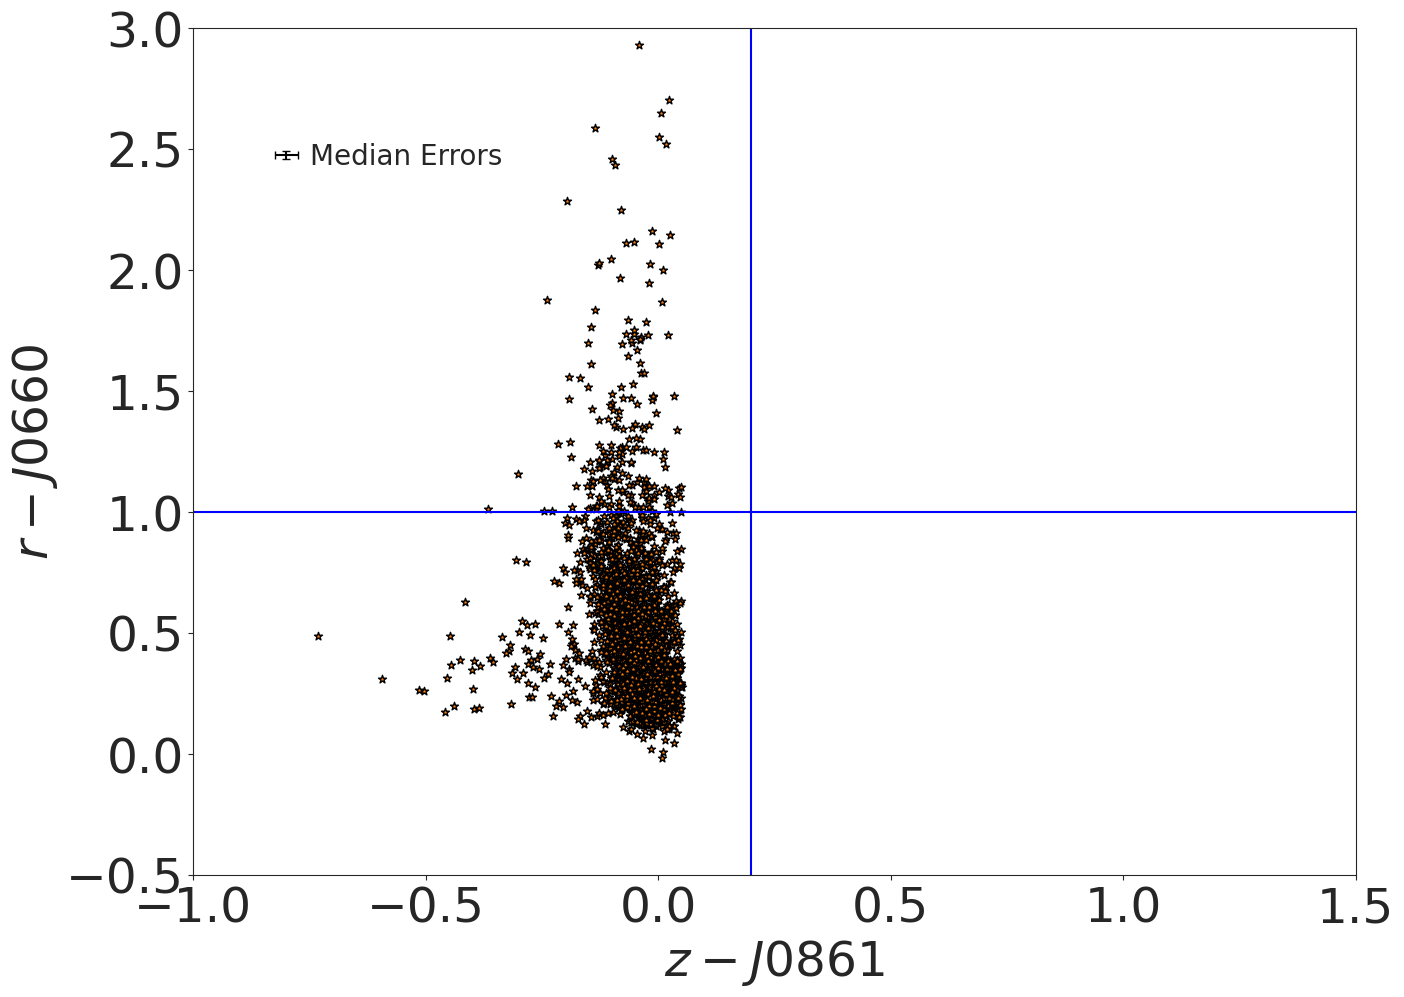

In [55]:
# Plotting
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(15, 11))
    #ax.spines["top"].set_visible(False)  
    #ax.spines["right"].set_visible(False)
    plt.xlabel(r"$z - J0861$", fontsize=35)
    plt.ylabel(r"$r - J0660$", fontsize=35)
    plt.tick_params(axis='x', labelsize=35) 
    plt.tick_params(axis='y', labelsize=35)

    # Create a density plot
    #density = ax.hexbin(cx, cy, cmap="nipy_spectral", gridsize=10, mincnt=1.0)
    #ax.scatter(cx, cy, color="#ff7f0e", marker="*", edgecolors="k", zorder=1)

    # Add a colorbar with improved visibility
    #cbar = plt.colorbar(density, ax=ax, orientation='vertical', pad=0.03, format='%.1f')
    #cbar.set_label("Density", fontsize=30)  # Provide a label for the colorbar
    # Contour plot
    # contour = sns.kdeplot(
    #     x=cx,
    #     y=cy,
    #     ax=ax,
    #     bw_method='silverman',  
    #     levels=[0.01, 0.05, 0.1, 0.2, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99],  
    #     fill=False,  
    #     zorder=3,  
    #     linewidths=2,  
    #     colors=['#AEEEEE', '#87CEEB', '#4682B4', '#4169E1'],  
    # )
    # Calcular el rango intercuartílico (IQR) para filtrar los datos en x e y
    q1_x, q3_x = np.percentile(cx_, [65, 95])
    iqr_x = q3_x - q1_x
    lower_bound_x = q1_x - 1.5 * iqr_x
    upper_bound_x = q3_x + 1.5 * iqr_x

    q1_y, q3_y = np.percentile(cy_, [35, 75])
    iqr_y = q3_y - q1_y
    lower_bound_y = q1_y - 1.5 * iqr_y
    upper_bound_y = q3_y + 1.5 * iqr_y

    # Filtrar los datos de cx y cy
    filtered_cx_ = cx_[(cx_ > lower_bound_x) & (cx_ < upper_bound_x)]
    filtered_cy_ = cy_[(cy_ > lower_bound_y) & (cy_ < upper_bound_y)]

    # Graficar los datos filtrados
    #sns.kdeplot(x=filtered_cx_, y=filtered_cy_, ax=ax, norm=PowerNorm(0.5), zorder=5, cmap="Reds")
    ax.scatter(cx_, cy_, color="#ff7f0e", marker="*", edgecolors="k", zorder=1)

    ax.set(
        xlim=[-1., 1.5],
        ylim=[-0.5, 3.0])

    plt.axvline(x = 0.2, color = 'b')
    plt.axhline(y = 1, color = 'b')
    pro_ri_ = median(ecx_)
    pro_rj660_ = median(ecy_)
    print("Median", pro_ri_)
    axis_coordinates_of_representative_error_bar = (0.08, 0.85)
    screen_coordinates_of_representative_error_bar = ax.transAxes.transform(axis_coordinates_of_representative_error_bar)
    screen_to_data_transform = ax.transData.inverted().transform
    data_coordinates_of_representative_error_bar = screen_to_data_transform(screen_coordinates_of_representative_error_bar)
    foo = data_coordinates_of_representative_error_bar

    ax.errorbar(foo[0], foo[1], xerr=pro_ri_, yerr=pro_rj660_, c="k", capsize=3)
    ax.annotate("Median Errors", xy=(-0.39, 2.78),  xycoords='data', size=20,
            xytext=(-120, -60), textcoords='offset points', )


In [56]:
df_cut.to_csv("../Ha-emitters/cut_J0861_menor005.csv", index=False)